In [1]:
import sys
from importlib import reload 
sys.path.append('../hdssm_story/lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [7]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=False):
    # Just new dists
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_hs_corrected" if for_ranking else "triple_trainable_l1_hs",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_ex_corrected" if for_ranking else "triple_trainable_l1_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_ex_corrected" if for_ranking else "triple_trainable_l1_sq_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("hyperspherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_all(for_ranking=False):
    return [
        ProductDistances([
            (10, Distances("euclidian_corrected" if for_ranking else "euclidian",
                           scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0_corrected" if for_ranking else "triple_trainable_l0",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected" if for_ranking else "triple_trainable_l1_sq",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected" if for_ranking else "triple_trainable_l1",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_hs_corrected" if for_ranking else "triple_trainable_l1_hs",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_ex_corrected" if for_ranking else "triple_trainable_l1_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_ex_corrected" if for_ranking else "triple_trainable_l1_sq_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("hyperspherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_3():
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (6, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_exp_dot(k=1):
    return [
        ProductDistances([
            (10, Distances("exp_minus_dot", scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_4():
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
    ]

_____________


In [8]:
!ls ../datasets

3d_sphere_triang_120.edges   clique_4.edges		  graph.clusters
3d_sphere_triang_1920.edges  clique_5.edges		  karate.edges
3d_sphere_triang_30.edges    conflict.edges		  polblogs.edges
3d_sphere_triang_480.edges   cora			  polbooks.edges
airport.edges		     CSPhDs.edges		  power.edges
bg_20_700_0.05.edges	     cycle_100.edges		  reactome.edges
bipartite_100.edges	     cycle_5.edges		  smalltree.edges
bipartite_5.edges	     dolphins.edges		  star_100.edges
ca-cit-HepTh.edges	     eu-core.edges		  star_5.edges
Ca-HelpTh.edges		     eu-core-no-self-loops.edges  tree_3_6.edges
chicago.edges		     euroroad.edges		  usca312.edges
citeseer		     EuroSiS.edges		  wla6.edges
clique_100.edges	     facebook.edges		  wla6.nodes
clique_12.edges		     football.edges


In [9]:
G, distances_matrix, r_matrix  = utils.get_dataset("facebook", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/facebook.edges
|V| = 4039, |E| = 88234


_____________________
# Training

In [14]:
# !mkdir pngs

In [15]:
distortion_loss_storyz = list()

In [16]:
def print_best_distortion():
    for i, d in enumerate(make_distances(False)+make_distances_exp_dot()):
        ar = np.array([
            distortion_loss_story_nth[i][-1]
            for distortion_loss_story_nth in distortion_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [17]:
def do_distortion_for_lr(lr=0.05):
    distortion_loss_storyz.append(
        utils.estimate_signatures_distortion(
            make_model_2, qs, distances_matrix, r_matrix,
            make_distances(False)+make_distances_exp_dot(), 2000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            different_d_sum=True, print_results=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_distortion()

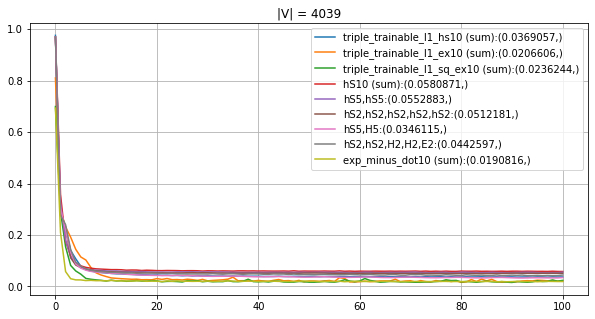


0.0369057	triple_trainable_l1_hs10 (sum)
0.0206606	triple_trainable_l1_ex10 (sum)
0.0236244	triple_trainable_l1_sq_ex10 (sum)
0.0580871	hS10 (sum)
0.0552883	hS5,hS5
0.0512181	hS2,hS2,hS2,hS2,hS2
0.0346115	hS5,H5
0.0442597	hS2,hS2,H2,H2,E2
0.0190816	exp_minus_dot10 (sum)


=== Current global best:

(0.0369057,)	triple_trainable_l1_hs10 (sum)
(0.0206606,)	triple_trainable_l1_ex10 (sum)
(0.0236244,)	triple_trainable_l1_sq_ex10 (sum)
(0.0580871,)	hS10 (sum)
(0.0552883,)	hS5,hS5
(0.0512181,)	hS2,hS2,hS2,hS2,hS2
(0.0346115,)	hS5,H5
(0.0442597,)	hS2,hS2,H2,H2,E2
(0.0190816,)	exp_minus_dot10 (sum)


In [18]:
do_distortion_for_lr(0.1)

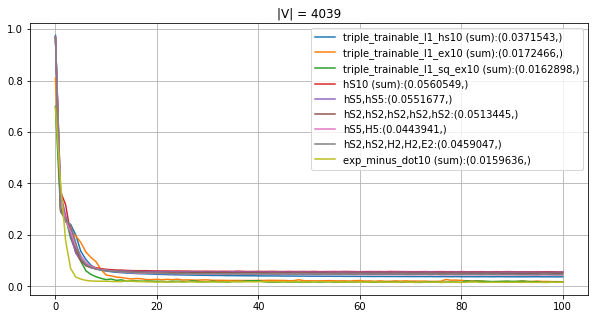


0.0371543	triple_trainable_l1_hs10 (sum)
0.0172466	triple_trainable_l1_ex10 (sum)
0.0162898	triple_trainable_l1_sq_ex10 (sum)
0.0560549	hS10 (sum)
0.0551677	hS5,hS5
0.0513445	hS2,hS2,hS2,hS2,hS2
0.0443941	hS5,H5
0.0459047	hS2,hS2,H2,H2,E2
0.0159636	exp_minus_dot10 (sum)


=== Current global best:

(0.0369057,)	triple_trainable_l1_hs10 (sum)
(0.0172466,)	triple_trainable_l1_ex10 (sum)
(0.0162898,)	triple_trainable_l1_sq_ex10 (sum)
(0.0560549,)	hS10 (sum)
(0.0551677,)	hS5,hS5
(0.0512181,)	hS2,hS2,hS2,hS2,hS2
(0.0346115,)	hS5,H5
(0.0442597,)	hS2,hS2,H2,H2,E2
(0.0159636,)	exp_minus_dot10 (sum)


In [23]:
do_distortion_for_lr(0.05)

In [19]:
softmax_loss_storyz = list()

In [20]:
def print_best_softmax():
    for i, d in enumerate(make_distances(True)+make_distances_exp_dot()):
        ar = np.array([
            softmax_loss_story_nth[i][-1]
            for softmax_loss_story_nth in softmax_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [21]:
def do_softmax_for_lr(lr=0.05):
    softmax_loss_storyz.append(
        utils.estimate_signatures_softmax(
            make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
            dists=make_distances(True)+make_distances_exp_dot(), iters=2000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            print_results=True, different_d_sum=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_softmax()

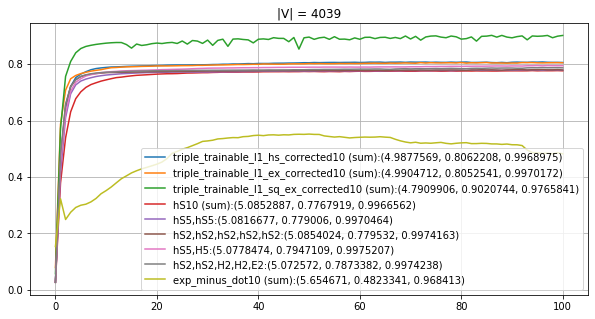


0.8062208	triple_trainable_l1_hs_corrected10 (sum)
0.8052541	triple_trainable_l1_ex_corrected10 (sum)
0.9020744	triple_trainable_l1_sq_ex_corrected10 (sum)
0.7767919	hS10 (sum)
0.779006	hS5,hS5
0.779532	hS2,hS2,hS2,hS2,hS2
0.7947109	hS5,H5
0.7873382	hS2,hS2,H2,H2,E2
0.4823341	exp_minus_dot10 (sum)


=== Current global best:

(4.9877569, 0.8062208, 0.9968975)	triple_trainable_l1_hs_corrected10 (sum)
(4.9904712, 0.8052541, 0.9970172)	triple_trainable_l1_ex_corrected10 (sum)
(4.7909906, 0.9020744, 0.9765841)	triple_trainable_l1_sq_ex_corrected10 (sum)
(5.0852887, 0.7767919, 0.9966562)	hS10 (sum)
(5.0816677, 0.779006, 0.9970464)	hS5,hS5
(5.0854024, 0.779532, 0.9974163)	hS2,hS2,hS2,hS2,hS2
(5.0778474, 0.7947109, 0.9975207)	hS5,H5
(5.072572, 0.7873382, 0.9974238)	hS2,hS2,H2,H2,E2
(5.654671, 0.4823341, 0.968413)	exp_minus_dot10 (sum)


In [22]:
do_softmax_for_lr(0.1)

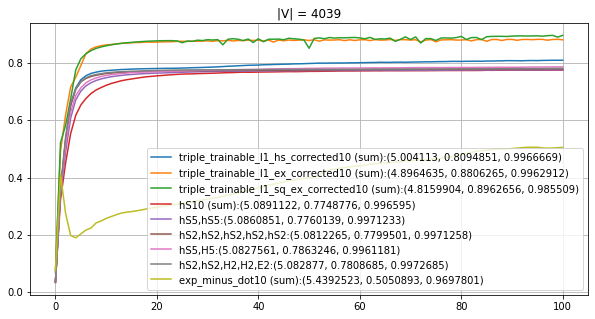


0.8094851	triple_trainable_l1_hs_corrected10 (sum)
0.8806265	triple_trainable_l1_ex_corrected10 (sum)
0.8962656	triple_trainable_l1_sq_ex_corrected10 (sum)
0.7748776	hS10 (sum)
0.7760139	hS5,hS5
0.7799501	hS2,hS2,hS2,hS2,hS2
0.7863246	hS5,H5
0.7808685	hS2,hS2,H2,H2,E2
0.5050893	exp_minus_dot10 (sum)


=== Current global best:

(4.9877569, 0.8094851, 0.9968975)	triple_trainable_l1_hs_corrected10 (sum)
(4.8964635, 0.8806265, 0.9970172)	triple_trainable_l1_ex_corrected10 (sum)
(4.7909906, 0.9020744, 0.985509)	triple_trainable_l1_sq_ex_corrected10 (sum)
(5.0852887, 0.7767919, 0.9966562)	hS10 (sum)
(5.0816677, 0.779006, 0.9971233)	hS5,hS5
(5.0812265, 0.7799501, 0.9974163)	hS2,hS2,hS2,hS2,hS2
(5.0778474, 0.7947109, 0.9975207)	hS5,H5
(5.072572, 0.7873382, 0.9974238)	hS2,hS2,H2,H2,E2
(5.4392523, 0.5050893, 0.9697801)	exp_minus_dot10 (sum)


In [24]:
do_softmax_for_lr(0.05)